# 순환신경망(RNN) - 순차 데이터의 이해.

# 순차 데이터 Sequential Data.
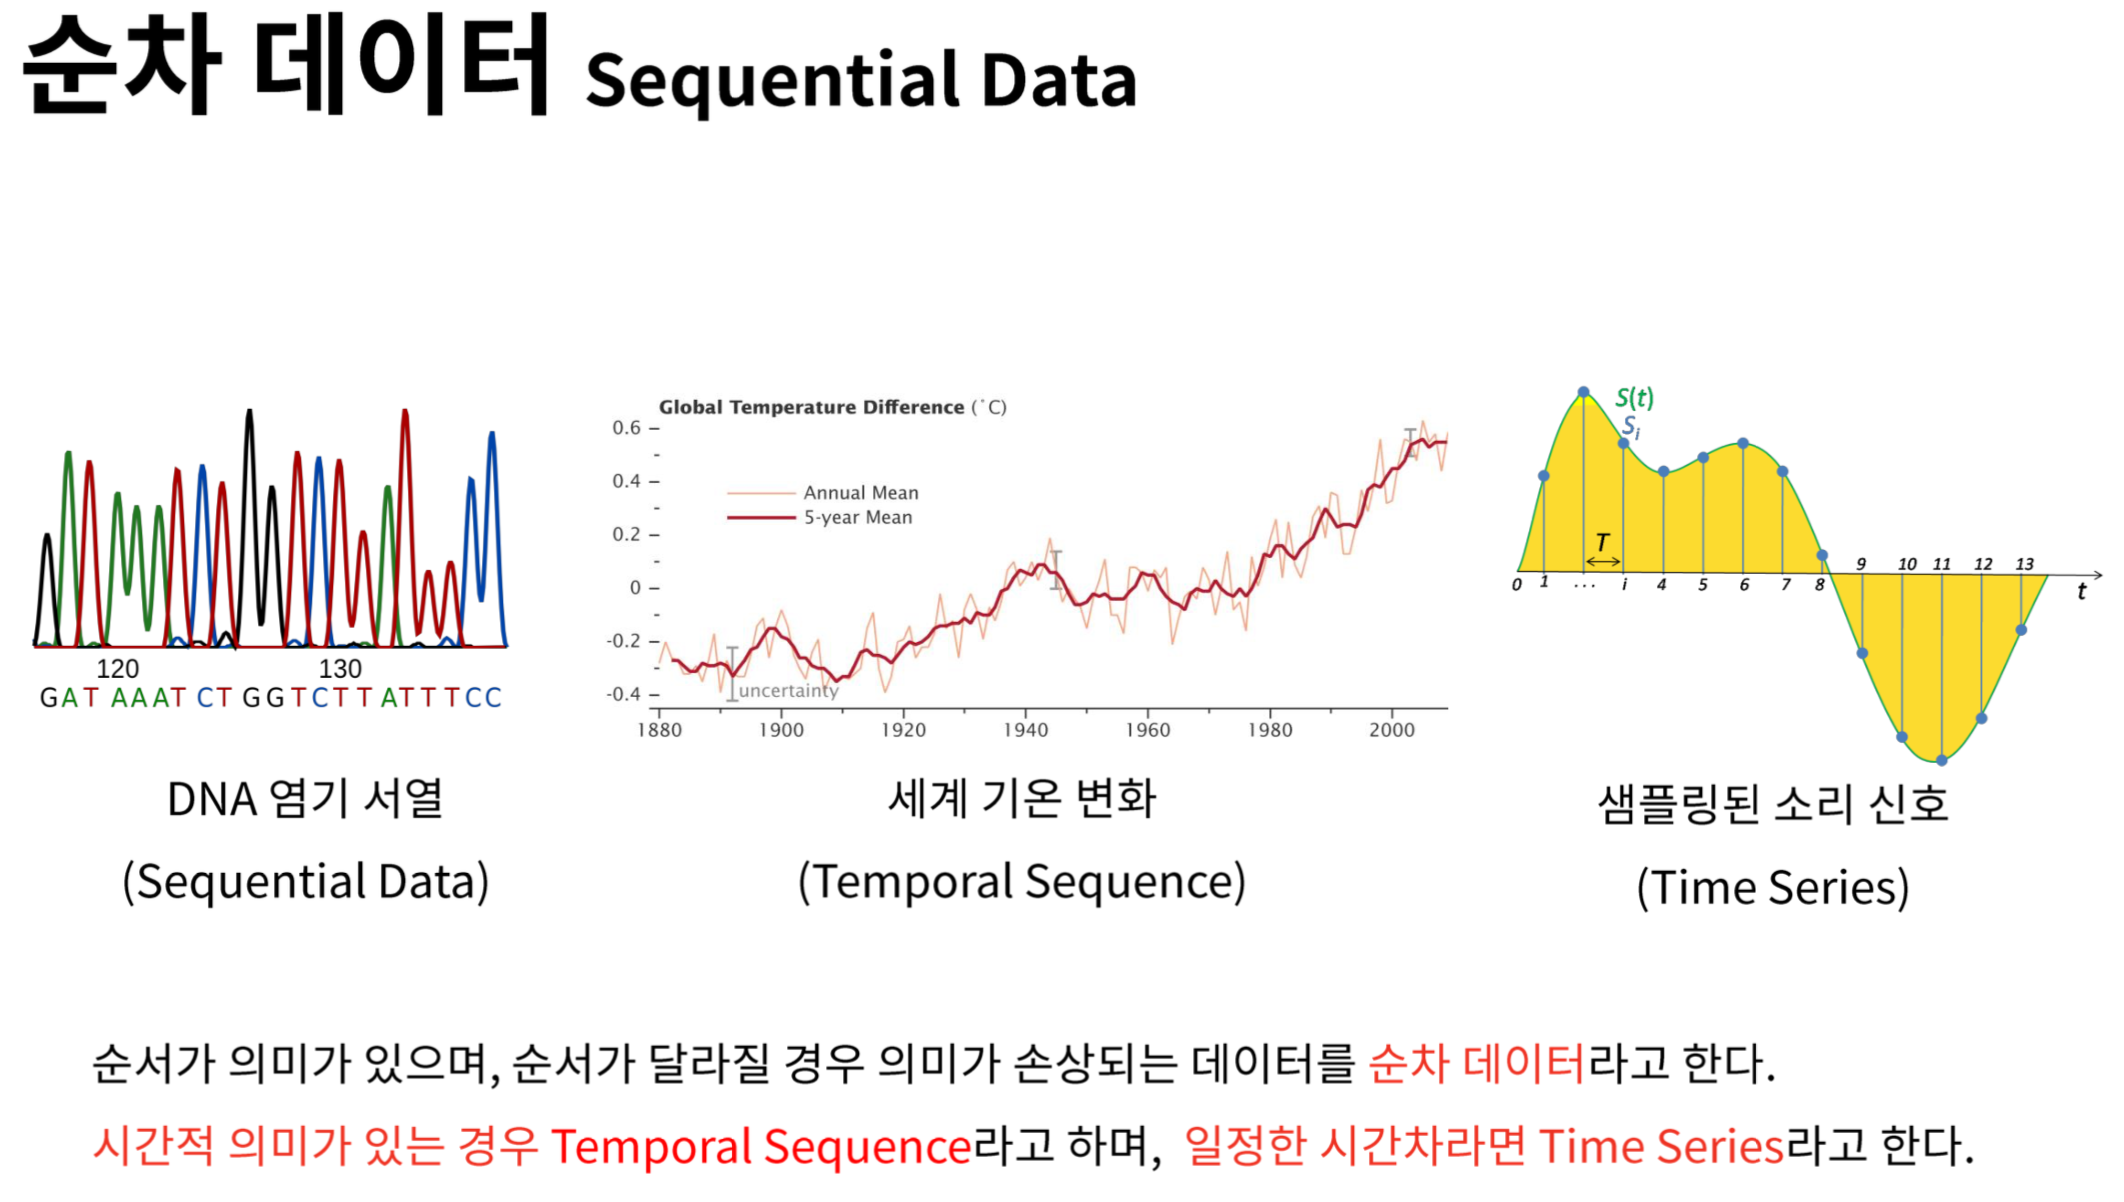

- 일정한 시간차를 갖는 Time Series라면, x축이 특정 시간을 의미하는 Temporal Sequence와는 다르게 하나하나의 Step으로 간주한다.

# 1. Recurrent Neural Network, RNN(순환신경망)
## 1-1. RNN 이란?

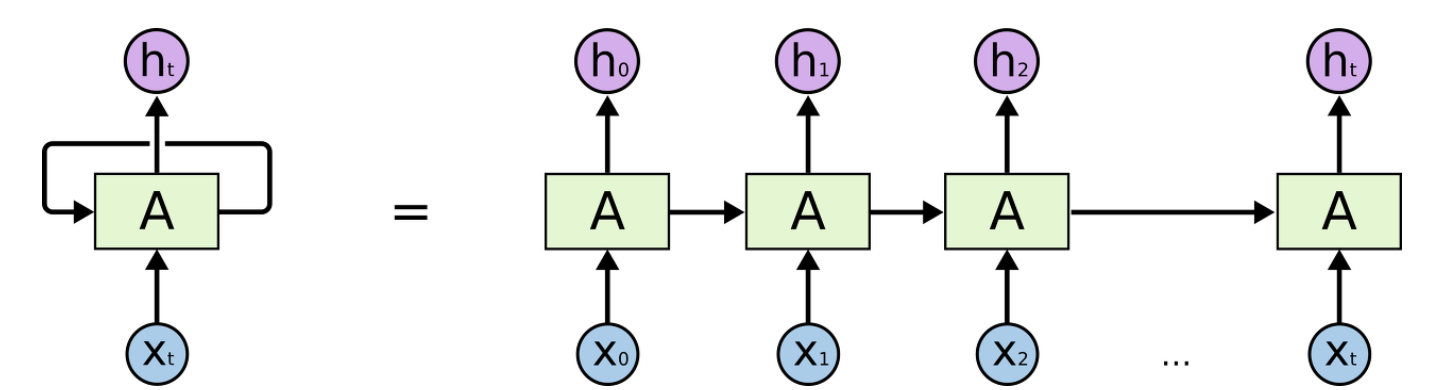

### CNN과 같은 신경망들은 전부 Hidden layer에서 activation function을 지난 값은 오직 출력층으로만 향했다.(Feed Forward Neural Network).
### 그러나 RNN은 hidden node에서 activation function을 통해 나온 출력을 출력층으로 내보내고, hidden node의 다음 연산의 입력으로도 내보내는 특징을 가지고 있다. 
### 왼쪽을 보면 A는 입력으로 Xt를 받아 ht를 출력한다. 
### A를 둘러싼 반복은 다음 단계에서의 network가 이전 단계의 정보를 받는다는 것을 의미한다.
### 왼쪽의 반복을 풀어서 보면 오른쪽이 된다. 이전 단계에서의 정보가 다음 단계에서 사용된다.
### CNN에서처럼, bias도 입력으로 존재할 수 있다. RNN에서 hidden layer에서 activation function을 통해 출력을 내보내는 역할을 하는 node를 cell이라고 한다. (위 그림의 A)
### 이 cell은 이전의 값을 기억하는 역할을 하므로 memory cell 또는 RNN cell이라고 부른다.
### Memory cell이 출력층 방향으로 또는 다음 시점인 t+1 시점의 memory cell이 보낸 hidden state 값을 t 시점의 hidden state 계산을 위한 입력값으로 사용한다.
### RNN에서 Xt와 ht는 기본적으로 벡터 단위이다. 이러한 구조로 인해 RNN은 시퀀스를 처리할 때 유리하다.
### RNN은 입력과 출력의 길이(Xt와 ht의 개수)를 다르게 설계할 수 있다. 
### 입력과 출력의 길이에 따라 일대다 / 다대일 / 다대다 등이 존재할 수 있다.
### 일정 시간 동안 모든 값이 계산되면, 모델을 학습하기 위해 결괏값과 목푯값의 차이를 loss function을 통해 계산하고 backpropagation(역전파)해야한다.
### 기존의 backpropagation과는 다르게 RNN은 계산에 사용된 시점의 수에 영향을 받는다.
### 예를 들어 t=0에서 t=2까지 계산에 사용됐다면 그 시간 전체에 대해 역전파를 해야한다. 
### 이를 BPTT(Backpropagation Through Time), 시간에 따른 역전파(시간펼침 역전파) 라고 한다.


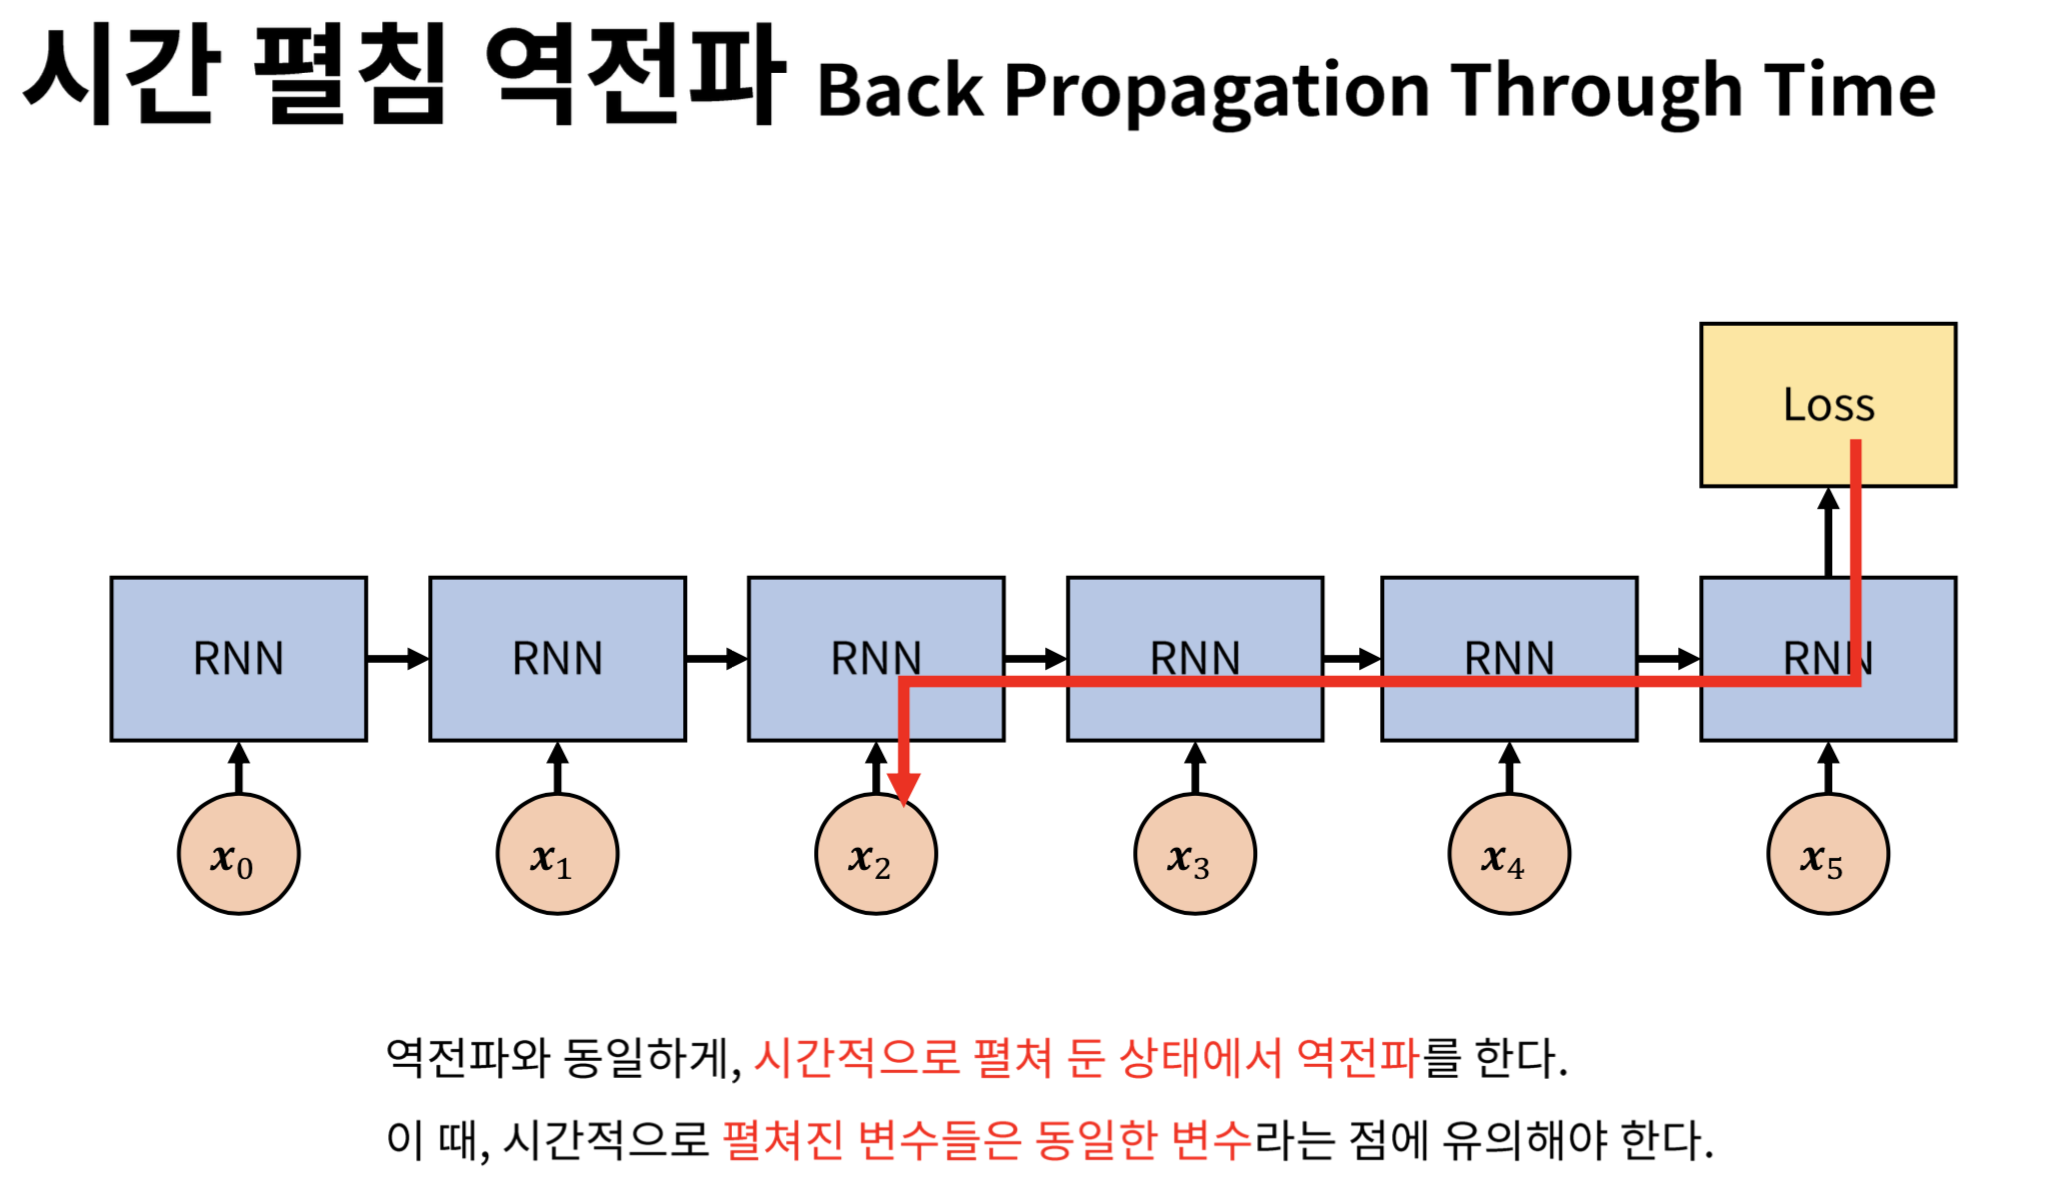

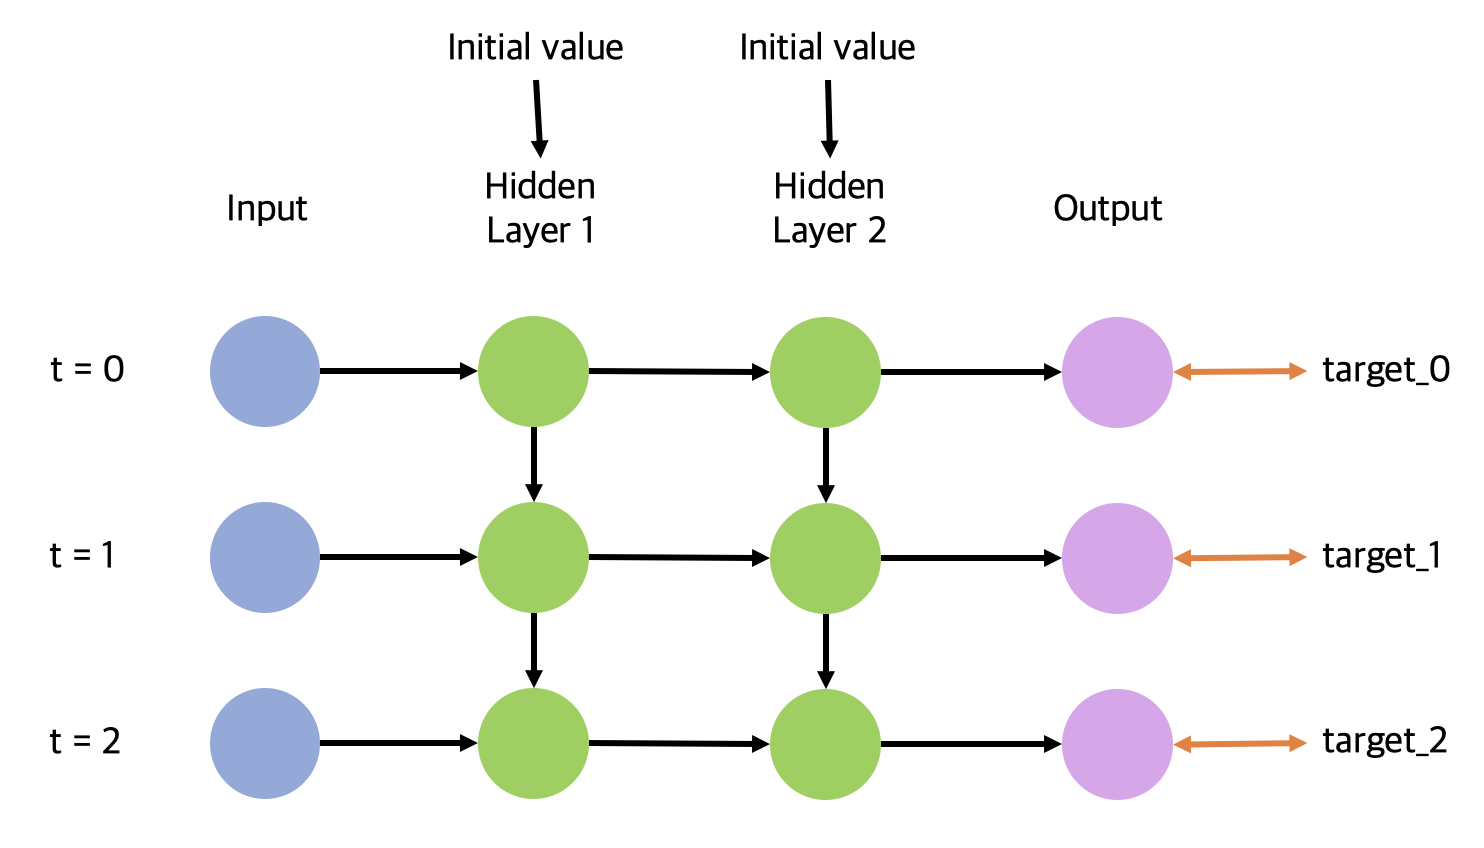

### 위 그림에서, t가 0, 1, 2인 시점에서 각각 결과값이 나오고 목표값과 비교되는 것을 볼 수 있다.
### 단어 "pytorch"를 예로 들면, t=0에서 p가 input으로 들어가고 t=0에서 output으로 y가 출력되기를 기대한다. 
### 따라서 target_0에는 y가 들어가고, 결과가 y와 같지 않다면 loss가 생길 것이다. 
### t=1에서 y가 들어가면 target_1은 t이고, t=2에서는 input이 t, target_2는 o가 된다.


### 이때, 모델을 학습하려면 t=2 시점에서 발생한 loss를 backpropgation하기 위해 loss를 input과 hidden layer 사이의 가중치로 미분하여 loss에 대한 각각의 비중을 구해 업데이트 하면 된다.
### 이 과정에서 이전 시점의 값들이 연산에 포함되게 되는데 이전 시점의 값들은 다시 가중치, input, 그 전 시점의 값의 조합이다.
### RNN은 각 위치별로 같은 가중치를 공유하므로 t=2 시점의 loss를 backpropgation하려면 결과적으로 t=0 시점의 노드 값들에도 모두 영향을 주어야 한다. 
### 즉, 시간을 역으로 거슬러 올라가는 방식으로 각 가중치들을 업데이트 해야하는 것이다.
### 가중치를 표시하면 다음과 같다.
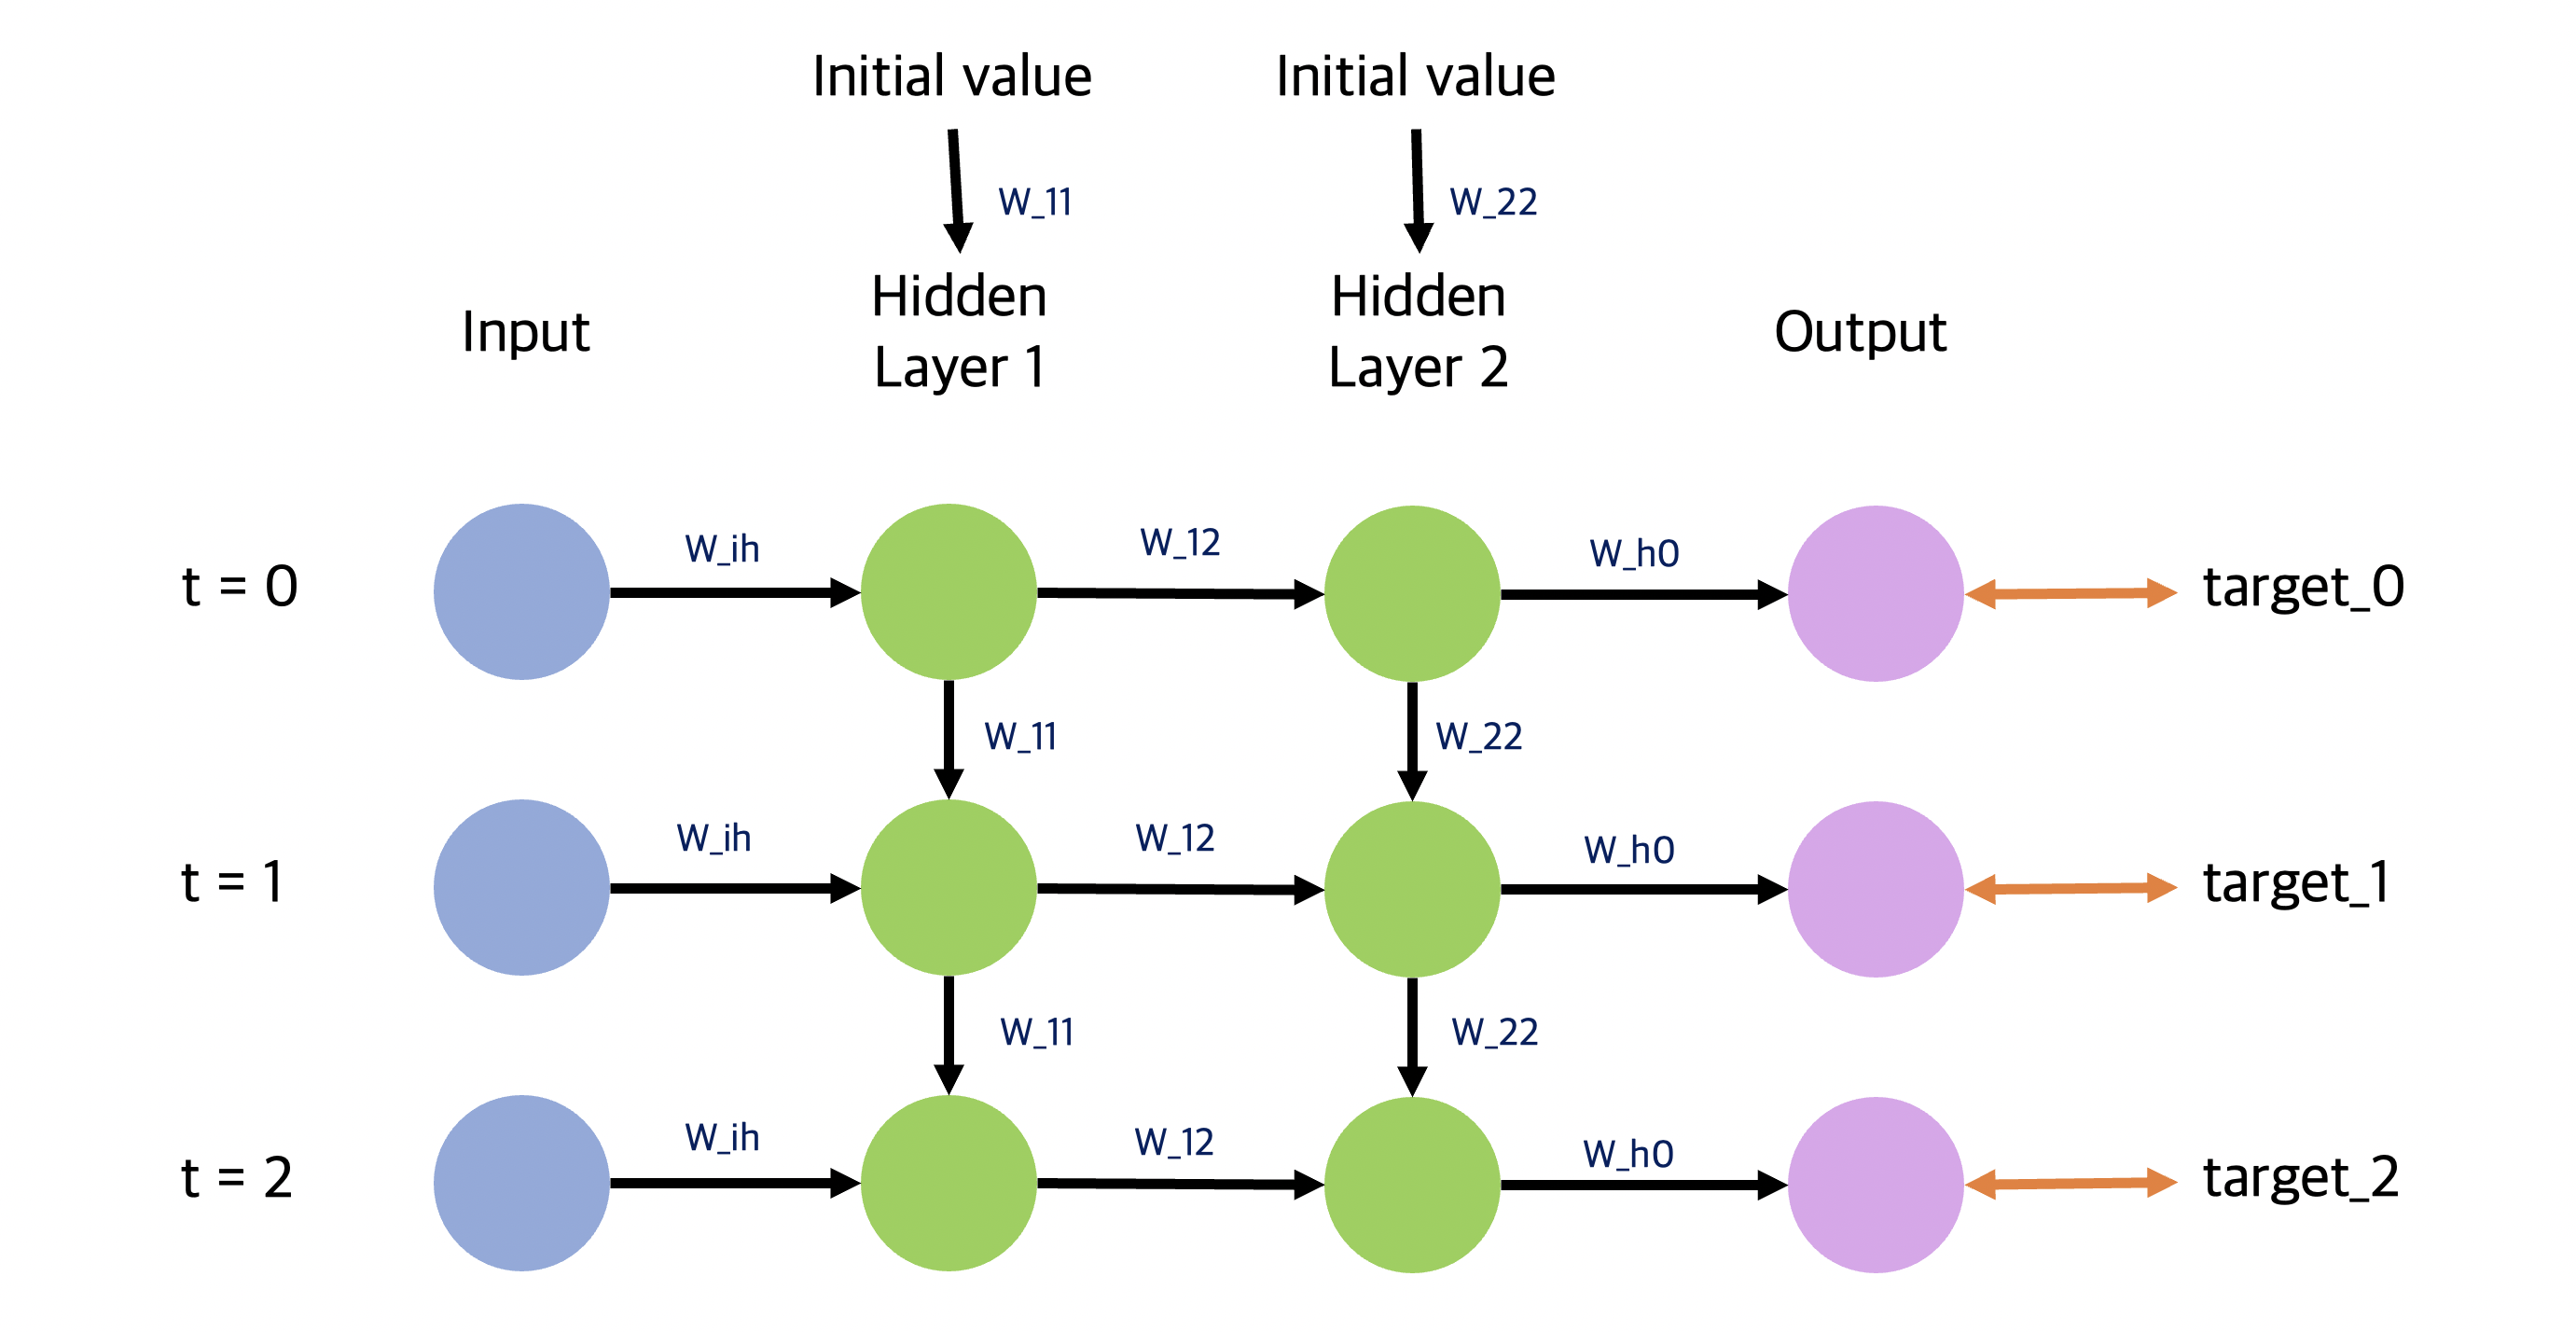

### 이 그림에서 t=2인 시점만 보면 다음과 같다. 기본적으로 RNN에서는 activation function으로 tanh함수를 사용한다.
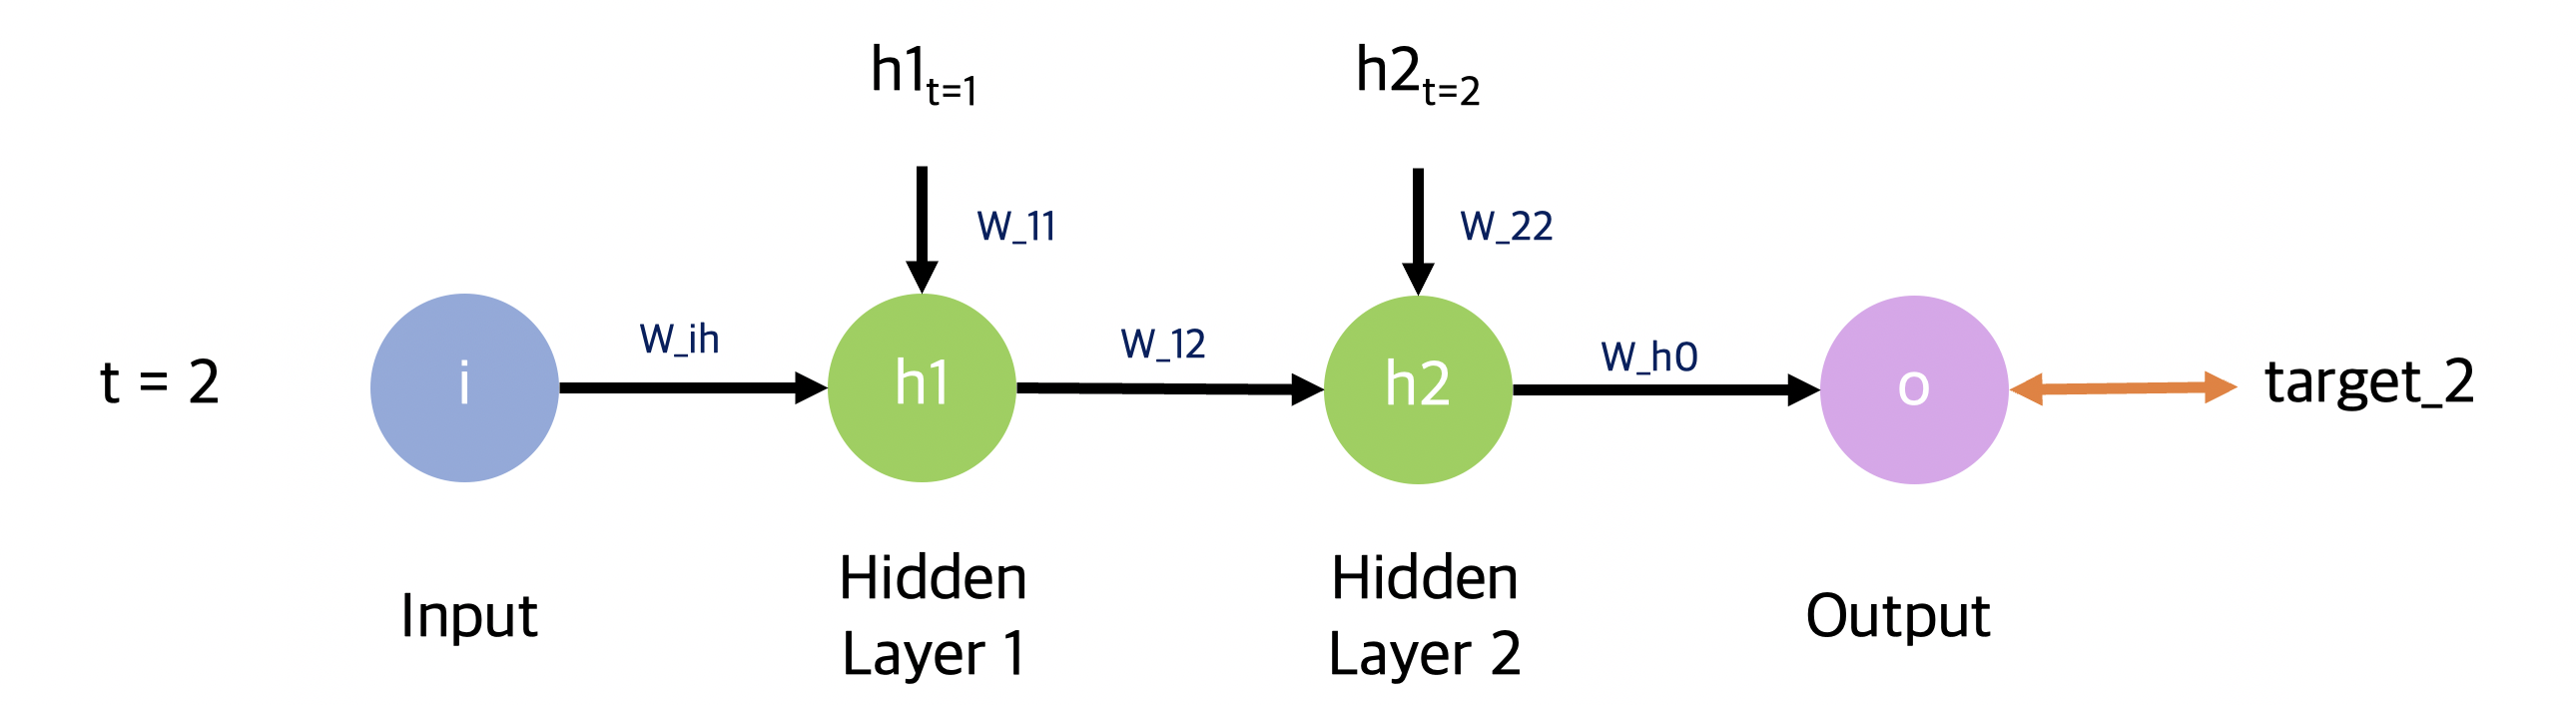

### - Tanh 활성화 함수.
#### - 입력 신호를 -1과 1 사이의 값으로 정규화 (시그모이드 함수 (0~1사이)와 유사)
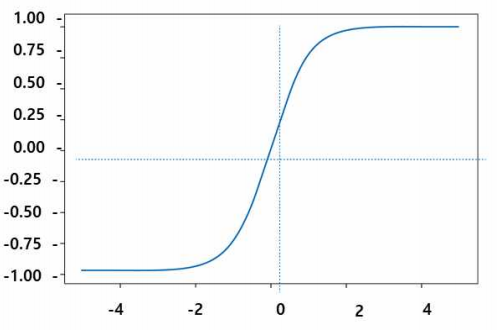

### 이것을 수식으로 나타내면 다음과 같다.
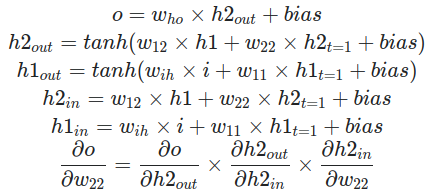

### 여기서 w_22에 대한 기울기를 보면 h2_in을 미분하는 부분이 있는데 이를 계산해보면 h2_t=1이 나온다.
### h2_t=1 값은 이전 시점의 값들의 조합이며 내부적으로도 w_22를 포함하고 있기 때문에 이 값을 제대로 미분하기 위해서는 t=0 까지 계속 미분을 해야한다.
### t=2에서 발생한 loss는 t=2, 1, 0 시점에 모두 영향을 주고 t=1 시점의 loss는 t=1, 0에 영향을 주며 t=0 시점의 손실은 t=0의 가중치에 영향을 준다.
### 따라서 실제로 업데이트를 할 때는 가중치에 대해 시점별 기울기를 다 더해서 한 번에 업데이트 한다.

# 1-2. RNN의 응용
### RNN의 가장 큰 특징은 이전 cell의 정보를 다음 cell의 연산에서 사용한다는 것이다. 따라서 순서가 중요할 때 유용하게 쓰인다. 
### 순서가 존재하는 데이터를 sequence 데이터라고 하며 대표적으로 자연어가 포함된다. 또한 똑같이 순서가 존재하지만, 특별한 시간에 따른 의미가 존재하는 데이터를 시계열 데이터 (time series data)라고 하며 대표적으로는 주가가 있다.

## 1-3. 입력-출력에 따른 활용 사례.

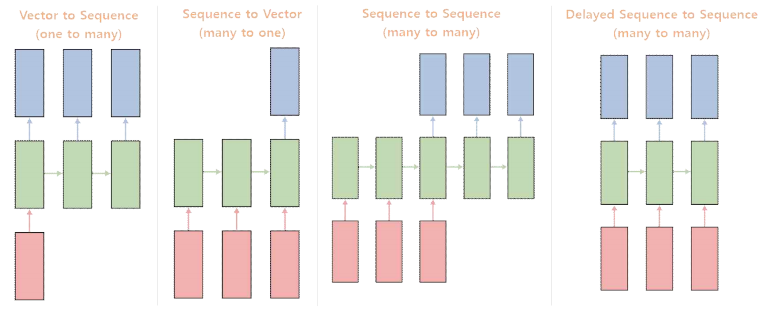

## 1-3-1. 다 대 일 (many to one)

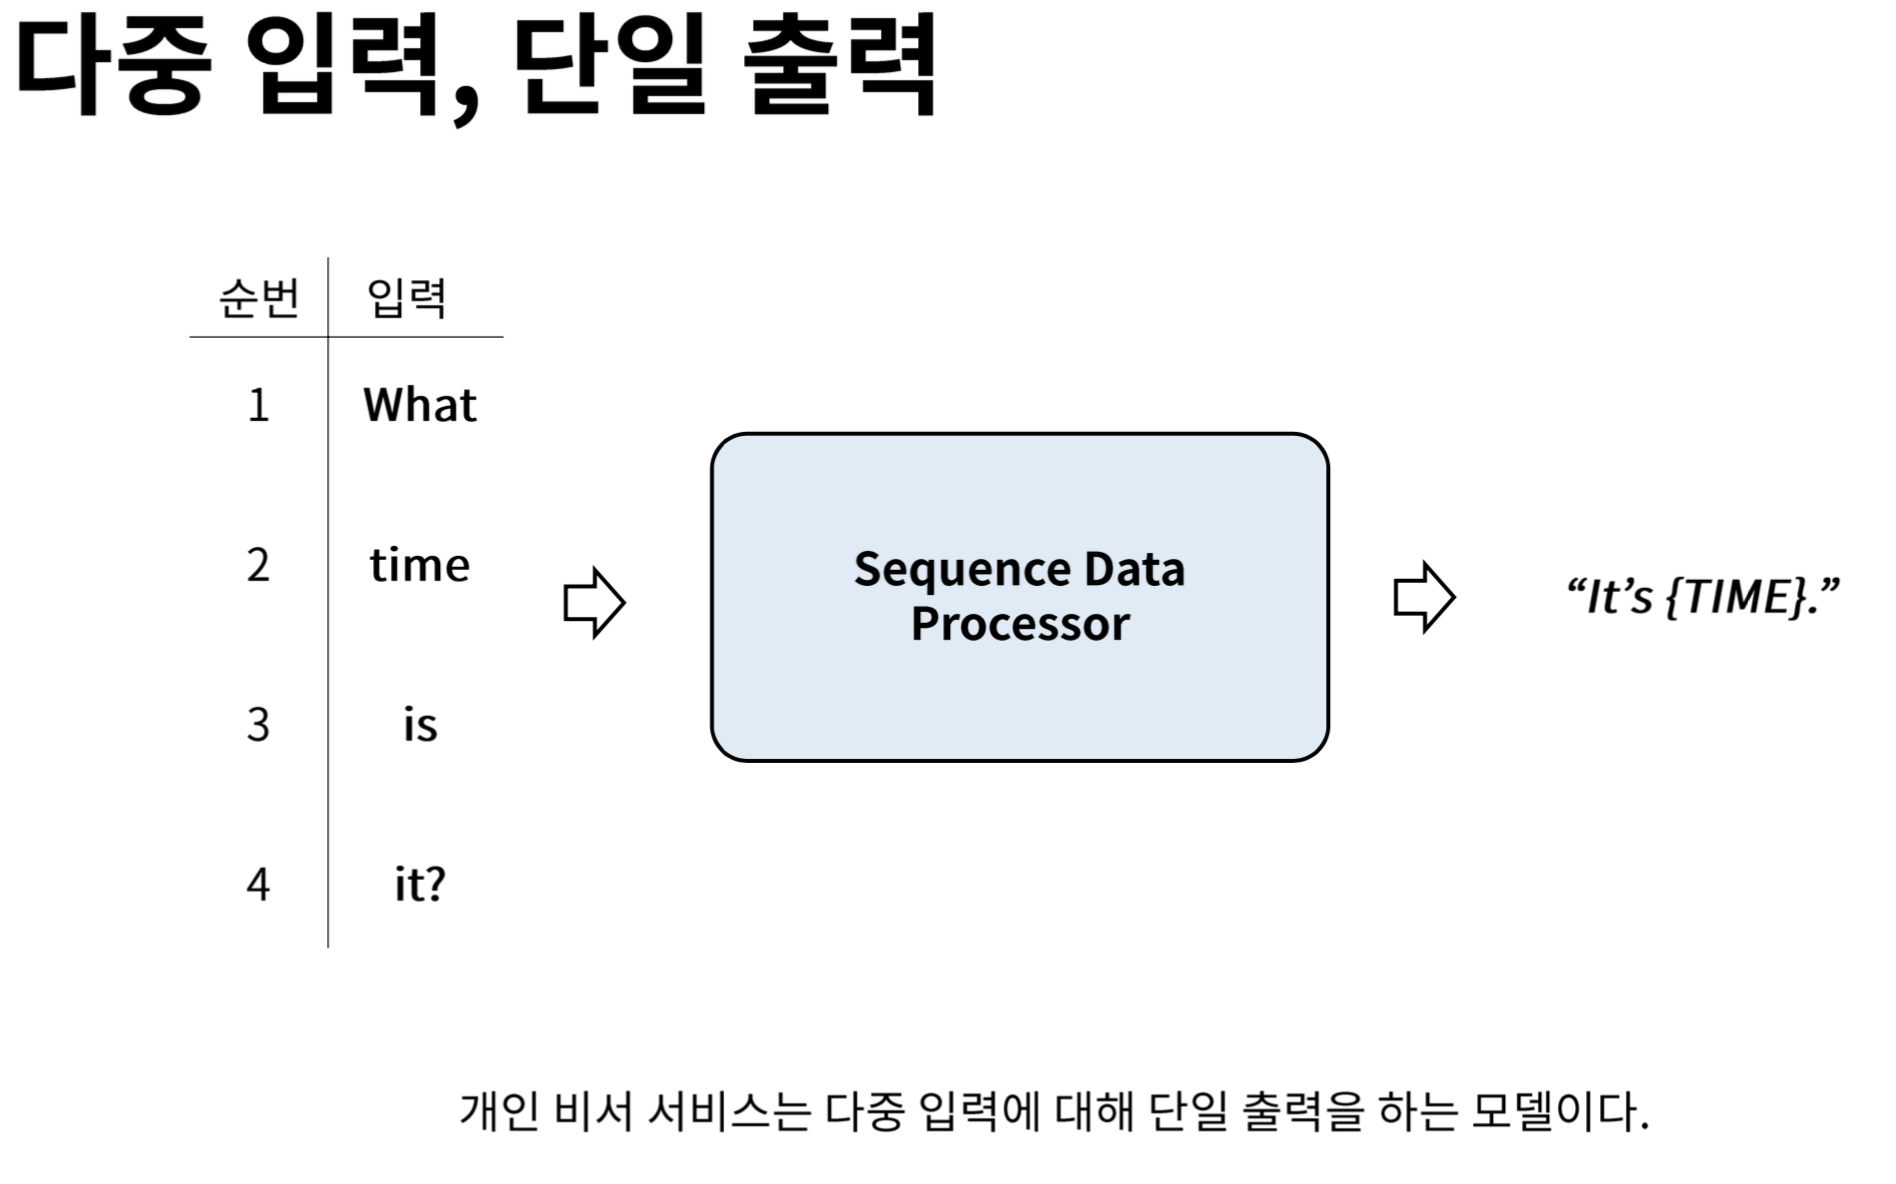
- 개인 비서 서비스는 예를 들어, siri나 구글의 okay google 같은 서비스이다.

## 1-3-2. 다 대 다 (many to many)

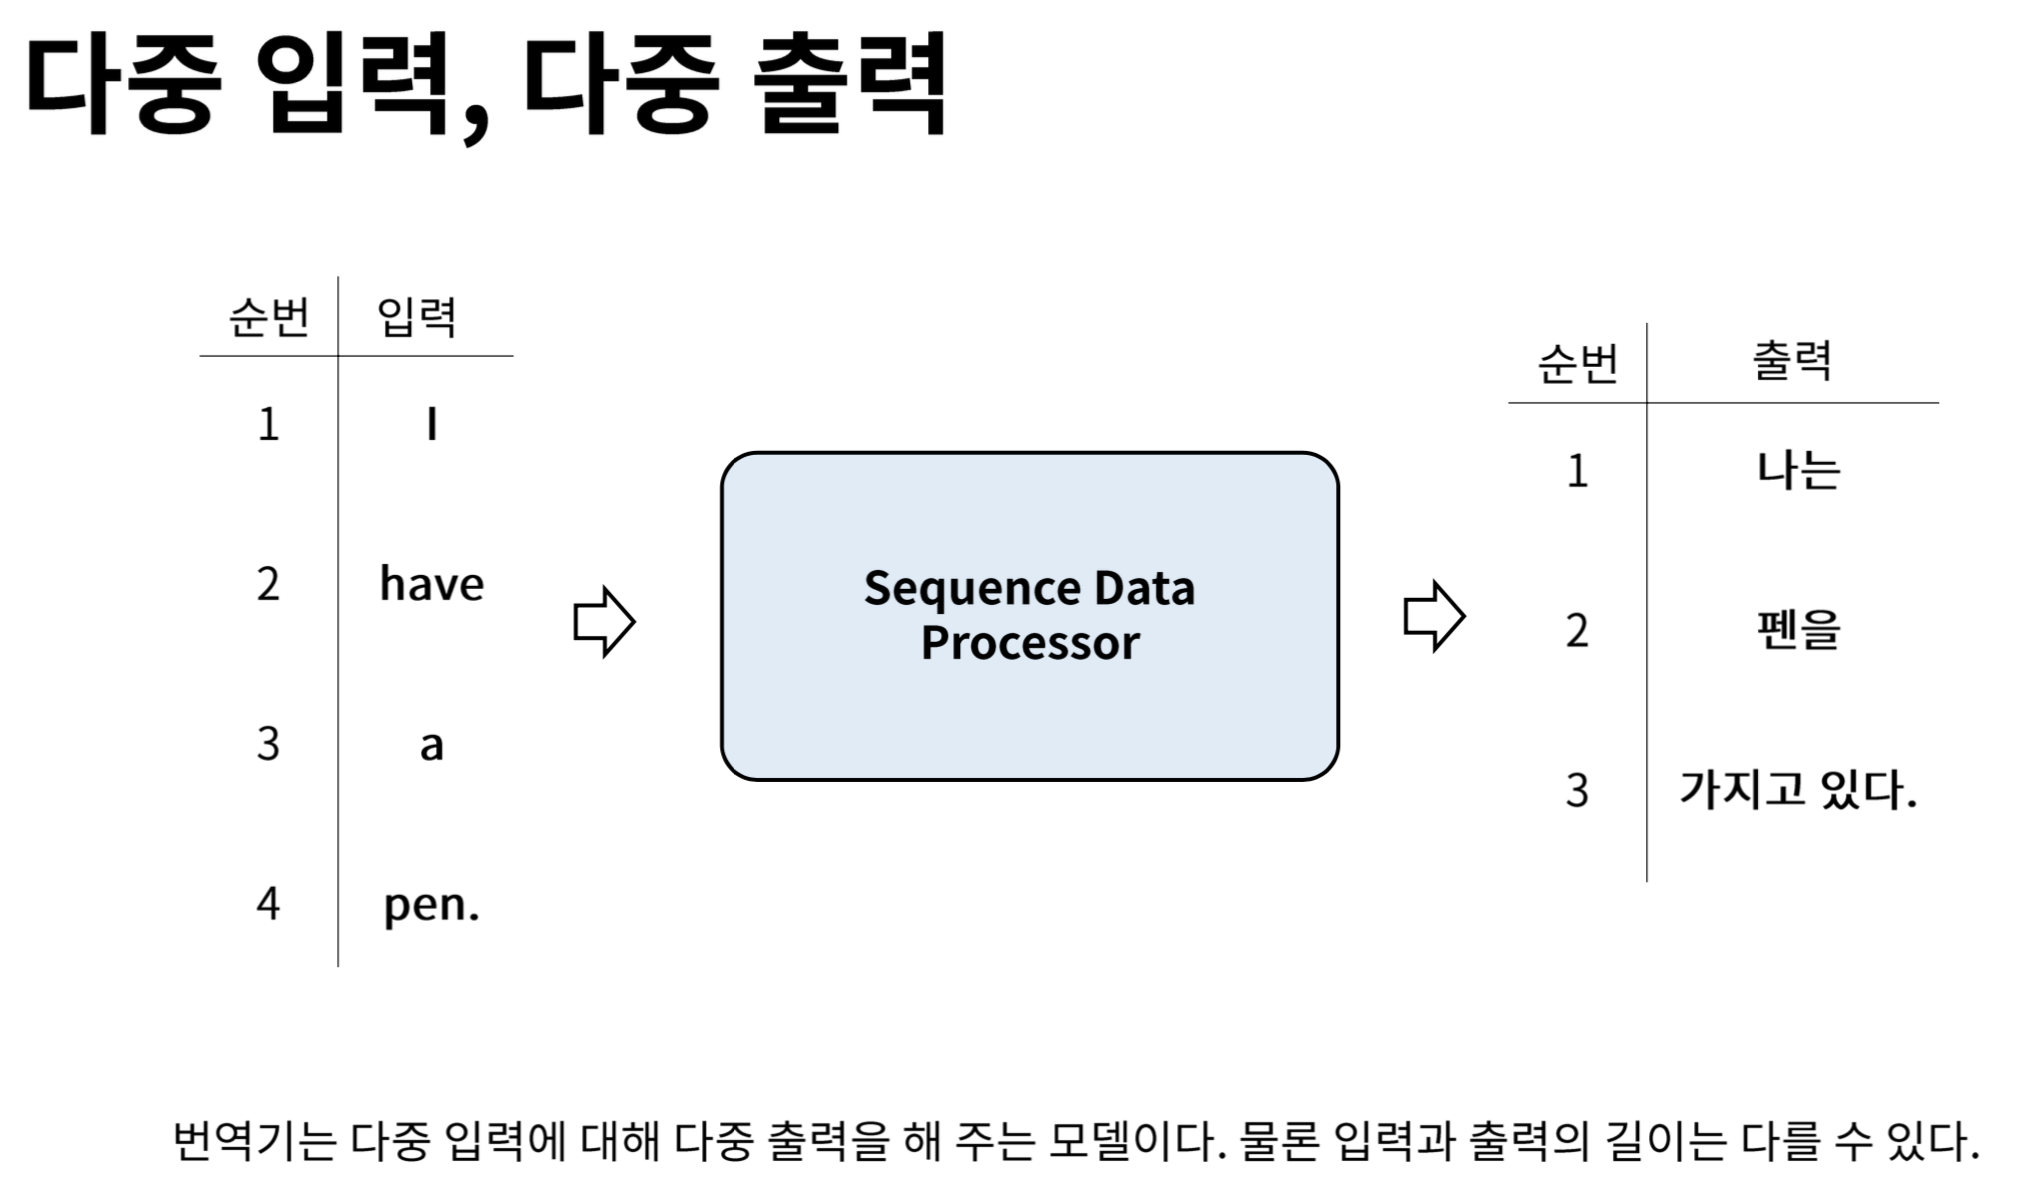


## 1-3-3. 일 대 다 (many to one)

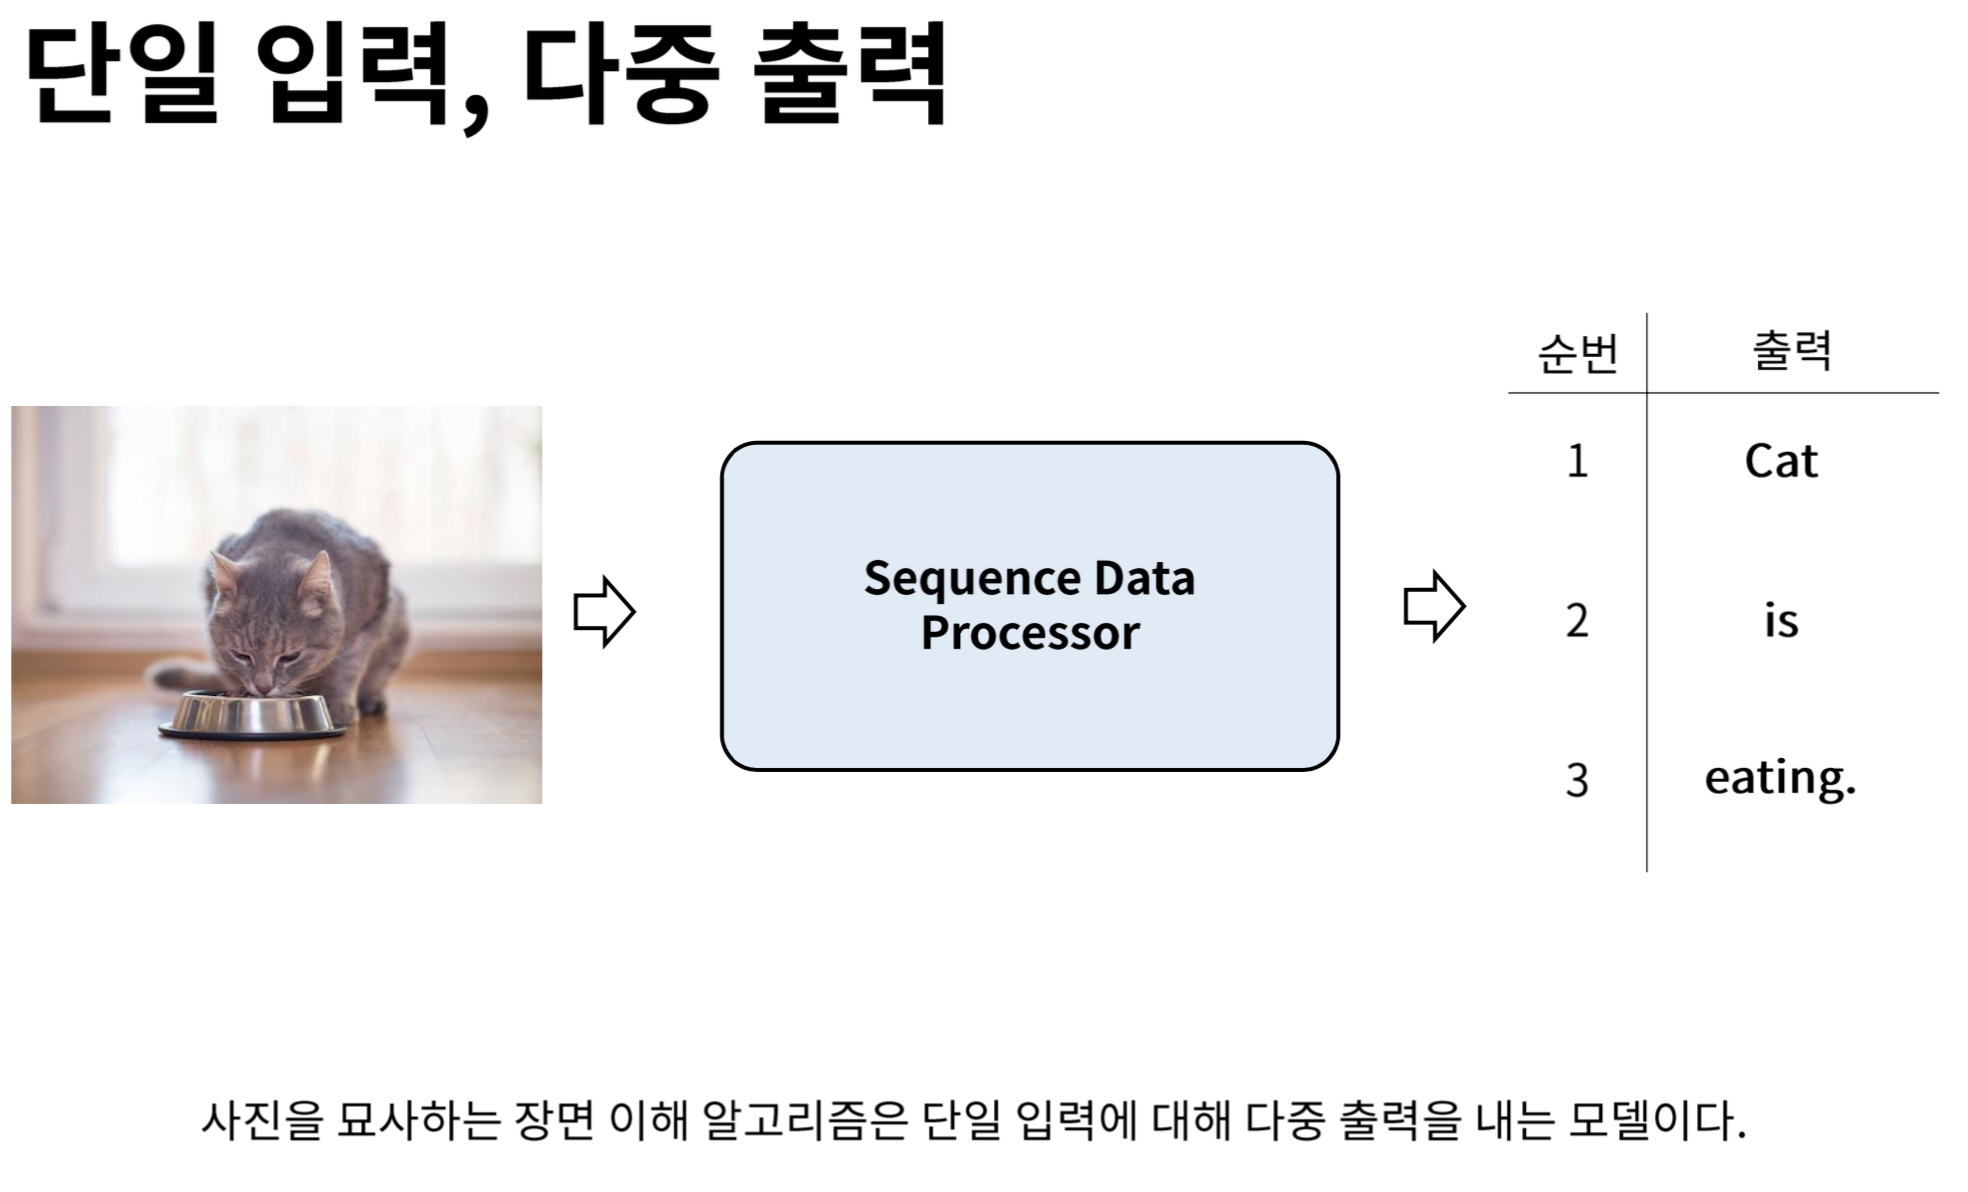